In [ ]:
#https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379


import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio

torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-10, 10, 1000), dim=1)  # x data (tensor), shape=(100, 1)
y = torch.sin(x) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('curve_2.png')
plt.show()

# another way to define a network
net = torch.nn.Sequential(
        torch.nn.Linear(1, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

BATCH_SIZE = 64
# EPOCH = 200
EPOCH = 20

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)

my_images = []
fig, ax = plt.subplots(figsize=(16,10))

# start training
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)     # input x and predict based on x

        loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        if step == 1:
            # plot and show learning process
            plt.cla()
            ax.set_title('Regression Analysis - model 3 Batches', fontsize=35)
            ax.set_xlabel('Independent variable', fontsize=24)
            ax.set_ylabel('Dependent variable', fontsize=24)
            ax.set_xlim(-11.0, 13.0)
            ax.set_ylim(-1.1, 1.2)
            ax.scatter(b_x.data.numpy(), b_y.data.numpy(), color = "blue", alpha=0.2)
            ax.scatter(b_x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
            ax.text(8.8, -0.8, 'Epoch = %d' % epoch,
                    fontdict={'size': 24, 'color':  'red'})
            ax.text(8.8, -0.95, 'Loss = %.4f' % loss.data.numpy(),
                    fontdict={'size': 24, 'color':  'red'})

            # Used to return the plot as an image array 
            # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
            fig.canvas.draw()       # draw the canvas, cache the renderer
            image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
            image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            my_images.append(image)

    


# save images as a gif    
imageio.mimsave('./curve_2_model_3_batch.gif', my_images, fps=12)


fig, ax = plt.subplots(figsize=(16,10))
plt.cla()
ax.set_title('Regression Analysis - model 3, Batches', fontsize=35)
ax.set_xlabel('Independent variable', fontsize=24)
ax.set_ylabel('Dependent variable', fontsize=24)
ax.set_xlim(-11.0, 13.0)
ax.set_ylim(-1.1, 1.2)
ax.scatter(x.data.numpy(), y.data.numpy(), color = "blue", alpha=0.2)
prediction = net(x)     # input x and predict based on x
ax.scatter(x.data.numpy(), prediction.data.numpy(), color='green', alpha=0.5)
plt.savefig('curve_2_model_3_batches.png')
plt.show()

In [1]:
#https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379


import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio
import pyreadr
torch.manual_seed(1)    # reproducible

In [2]:
TrainSet_eonr2_df = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/TrainSet_eonr2.rds")[None] # also works for RData
high_var = ['rain_30', 'rain_60','rain_90', 't_max_30', 't_max_60', 't_max_90', 't_min_30', 't_min_60', 't_min_90', 'Y_prev',
 'Y_corn_lt_avg', 'day_sow', 'day_v5', 'lai_v5', 'whc', 'oc_20cm_v5', 'sw_dep_v5', 'n_0_60cm_v5', 'surfaceom_wt_v5', 'sand_40cm', 'clay_40cm']
TrainSet_eonr2_df = TrainSet_eonr2_df[high_var+['eonr']]

In [3]:
y = TrainSet_eonr2_df['eonr']
x = TrainSet_eonr2_df.drop('eonr', axis=1)
x = x.values
y = y.values
print(x.shape, y.shape)    
x = Variable(torch.FloatTensor(x))
y = Variable(torch.FloatTensor(y))

(4456, 21) (4456,)


In [4]:
# another way to define a network
net = torch.nn.Sequential(
        torch.nn.Linear(21, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

BATCH_SIZE = 64
# EPOCH = 200
EPOCH = 20

torch_dataset = Data.TensorDataset(x, y)

loader = Data.DataLoader(
    dataset=torch_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=2,)



In [6]:
# start training
for epoch in range(EPOCH):
    for step, (batch_x, batch_y) in enumerate(loader): # for each training step
        
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        prediction = net(b_x)     # input x and predict based on x

        loss = loss_func(prediction, b_y)     # must be (1. nn output, 2. target)

        optimizer.zero_grad()   # clear gradients for next train
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

In [7]:
#Make predictions with returned model
prediction_set_aggregated_df = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/prediction_set_aggregated_dt.rds")[None] # also works for RData

X_pred = prediction_set_aggregated_df[['rain_30', 'rain_60','rain_90', 't_max_30', 't_max_60', 't_max_90', 't_min_30', 't_min_60', 't_min_90', 'Y_prev',
 'Y_corn_lt_avg', 'day_sow', 'day_v5', 'lai_v5', 'whc', 'oc_20cm_v5', 'sw_dep_v5', 'n_0_60cm_v5', 'surfaceom_wt_v5', 'sand_40cm', 'clay_40cm']]

X_pred=X_pred.values

X = Variable(torch.FloatTensor(X_pred)) 
y_pred = net(X) #This outputs the value for regression
y_pred=y_pred.data[:,0].numpy()
y_pred
prediction_set_aggregated_df['eonr_pred'] = y_pred

# now let's write a Rds
pyreadr.write_rds("/home/germanm2/n_policy_box/Data/files_rds/prediction_set_aggregated_cnn_dt.rds", prediction_set_aggregated_df)
prediction_set_aggregated_df.head()

,id_10,id_field,region,z,eonr_12,rain_30,rain_60,rain_90,t_max_30,t_max_60,...,lai_v5,whc,oc_20cm_v5,sw_dep_v5,n_0_60cm_v5,surfaceom_wt_v5,sand_40cm,clay_40cm,area_ha,eonr_pred
0,5,3.0,3.0,11,200.0,125.0,229.0,17.0,22.050000,15.216667,...,0.408,294.075688,1.620588,629.483784,35.048204,465.378891,5.071375,21.024234,40.0,182.936661
1,5,3.0,3.0,13,200.0,140.0,108.0,19.0,22.133333,15.933333,...,0.402,294.075688,1.625338,666.127141,42.310082,511.010443,5.071375,21.024234,40.0,178.874893
2,5,3.0,3.0,15,240.0,96.0,101.0,39.0,20.666667,16.783333,...,0.406,294.075688,1.622531,620.573678,46.126236,497.375201,5.071375,21.024234,40.0,180.792358
3,5,3.0,3.0,17,160.0,96.0,47.0,33.0,22.016667,17.066667,...,0.397,294.075688,1.620151,629.544435,70.271481,462.792524,5.071375,21.024234,40.0,179.913651
4,5,3.0,3.0,19,200.0,43.0,183.0,51.0,23.916667,12.283333,...,0.398,294.075688,1.623718,623.843297,47.598318,721.119533,5.071375,21.024234,40.0,179.406784


In [12]:
prediction_set_aggregated_df['eonr_pred'].min()
prediction_set_aggregated_df['eonr_pred'].max()
prediction_set_aggregated_df['eonr_pred'].mean()

169.93728637695312

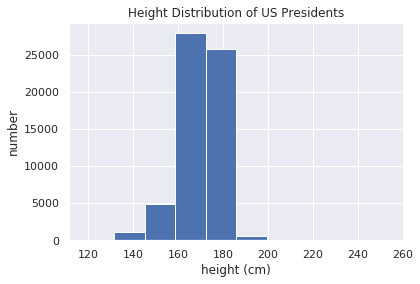

In [13]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
plt.hist(prediction_set_aggregated_df['eonr_pred'])
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');
